In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
#import os
#import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scvi
#import gzip
from statsmodels.stats import weightstats as stests

from matplotlib import rcParams

Global seed set to 0


In [ ]:
BS22735A_g = pd.read_csv("BS22735A_g_v11_threshold_0_mixed_species_gene_matrix.txt", sep="\t", index_col=0)
BS22736A_g = pd.read_csv("BS22736A_g_v11_threshold_0_mixed_species_gene_matrix.txt", sep="\t", index_col=0)
BS22737A_g = pd.read_csv("BS22737A_g_v11_threshold_0_mixed_species_gene_matrix.txt", sep="\t", index_col=0)
BS22738A_g = pd.read_csv("BS22738A_g_v11_threshold_0_mixed_species_gene_matrix.txt", sep="\t", index_col=0)
BS22739A_g = pd.read_csv("BS22739A_g_v11_threshold_0_mixed_species_gene_matrix.txt", sep="\t", index_col=0)
BS22740A_g = pd.read_csv("BS22740A_g_v11_threshold_0_mixed_species_gene_matrix.txt", sep="\t", index_col=0)
BS22741A_g = pd.read_csv("BS22741A_g_v11_threshold_0_mixed_species_gene_matrix.txt", sep="\t", index_col=0)
BS22742A_g = pd.read_csv("BS22742A_g_v11_threshold_0_mixed_species_gene_matrix.txt", sep="\t", index_col=0)

In [3]:
counts = pd.concat([BS22735A_g,BS22736A_g,BS22737A_g,BS22738A_g,BS22739A_g,BS22740A_g, BS22741A_g, BS22742A_g],axis=0).fillna(0)
counts

,NC_007793.1:SAUSA300_RS00010,NC_007793.1:SAUSA300_RS00015,NC_007793.1:SAUSA300_RS00020,NC_007793.1:SAUSA300_RS00025,NC_007793.1:SAUSA300_RS00030,NC_007793.1:SAUSA300_RS00035,NC_007793.1:SAUSA300_RS00040,NC_007793.1:SAUSA300_RS00045,NC_007793.1:SAUSA300_RS00050,NC_007793.1:SAUSA300_RS00055,...,NC_007793.1:SAUSA300_RS09120,NC_007793.1:SAUSA300_RS13590,NC_007793.1:SAUSA300_RS04455,NC_007793.1:SAUSA300_RS14650,NC_007793.1:SAUSA300_RS04150,NC_007793.1:SAUSA300_RS09565,NC_007793.1:SAUSA300_RS14165,NC_007793.1:SAUSA300_RS15540,NC_007793.1:SAUSA300_RS01270,NC_007793.1:SAUSA300_RS03270
BS22735A_bc1_10_bc2_10_bc3_17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22735A_bc1_10_bc2_10_bc3_25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22735A_bc1_10_bc2_10_bc3_38,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22735A_bc1_10_bc2_10_bc3_59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22735A_bc1_10_bc2_10_bc3_7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BS22742A_bc1_9_bc2_9_bc3_22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22742A_bc1_9_bc2_9_bc3_44,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22742A_bc1_9_bc2_9_bc3_56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22742A_bc1_9_bc2_9_bc3_94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
counts.columns = counts.columns.str[12:]
counts  

,SAUSA300_RS00010,SAUSA300_RS00015,SAUSA300_RS00020,SAUSA300_RS00025,SAUSA300_RS00030,SAUSA300_RS00035,SAUSA300_RS00040,SAUSA300_RS00045,SAUSA300_RS00050,SAUSA300_RS00055,...,SAUSA300_RS09120,SAUSA300_RS13590,SAUSA300_RS04455,SAUSA300_RS14650,SAUSA300_RS04150,SAUSA300_RS09565,SAUSA300_RS14165,SAUSA300_RS15540,SAUSA300_RS01270,SAUSA300_RS03270
BS22735A_bc1_10_bc2_10_bc3_17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22735A_bc1_10_bc2_10_bc3_25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22735A_bc1_10_bc2_10_bc3_38,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22735A_bc1_10_bc2_10_bc3_59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22735A_bc1_10_bc2_10_bc3_7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BS22742A_bc1_9_bc2_9_bc3_22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22742A_bc1_9_bc2_9_bc3_44,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22742A_bc1_9_bc2_9_bc3_56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22742A_bc1_9_bc2_9_bc3_94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
gff = pd.read_csv("/Users/peien/Dropbox (NYU Langone Health)/evolution/USA300_FPR3757_rRNA_edited.txt", header=None, sep="\t")
gff

,0,1,2,3,4,5,6,7,8
0,NC_007793.1,RefSeq,region,1,2872769,.,+,.,ID=NC_007793.1:1..2872769;Dbxref=taxon:451515;...
1,NC_007793.1,RefSeq,gene,544,1905,.,+,.,ID=gene-SAUSA300_RS00010;Name=dnaA;gbkey=Gene;...
2,NC_007793.1,Protein Homology,CDS,544,1905,.,+,0,ID=cds-WP_001290433.1;Parent=gene-SAUSA300_RS0...
3,NC_007793.1,RefSeq,gene,2183,3316,.,+,.,ID=gene-SAUSA300_RS00015;Name=dnaN;gbkey=Gene;...
4,NC_007793.1,Protein Homology,CDS,2183,3316,.,+,0,ID=cds-WP_000969811.1;Parent=gene-SAUSA300_RS0...
...,...,...,...,...,...,...,...,...,...
5937,NC_007793.1,custom,gene,2001081,2001171,.,-,.,locus_tag=pre_rRNA
5938,NC_007793.1,custom,gene,2175926,2175997,.,-,.,locus_tag=pre_rRNA
5939,NC_007793.1,custom,gene,2178921,2179468,.,-,.,locus_tag=pre_rRNA
5940,NC_007793.1,custom,gene,2292480,2292551,.,-,.,locus_tag=pre_rRNA


In [6]:
rRNA = gff[gff[2]=="rRNA"][8].str.extract('locus_tag=(.{,16})').values.tolist()
rRNA.append(['pre_rRNA'])
rRNA

[['SAUSA300_RS02440'],
 ['SAUSA300_RS02445'],
 ['SAUSA300_RS02450'],
 ['SAUSA300_RS02665'],
 ['SAUSA300_RS02675'],
 ['SAUSA300_RS02685'],
 ['SAUSA300_RS02690'],
 ['SAUSA300_RS10035'],
 ['SAUSA300_RS10040'],
 ['SAUSA300_RS10055'],
 ['SAUSA300_RS11085'],
 ['SAUSA300_RS11090'],
 ['SAUSA300_RS11095'],
 ['SAUSA300_RS11685'],
 ['SAUSA300_RS11690'],
 ['SAUSA300_RS11695'],
 ['pre_rRNA']]

In [7]:
tRNA = gff[gff[2]=="tRNA"][8].str.extract('locus_tag=(.{,16})').values.tolist()
tRNA

[['SAUSA300_RS00095'],
 ['SAUSA300_RS00100'],
 ['SAUSA300_RS02390'],
 ['SAUSA300_RS02670'],
 ['SAUSA300_RS02680'],
 ['SAUSA300_RS04975'],
 ['SAUSA300_RS04980'],
 ['SAUSA300_RS05785'],
 ['SAUSA300_RS09700'],
 ['SAUSA300_RS09705'],
 ['SAUSA300_RS09710'],
 ['SAUSA300_RS09715'],
 ['SAUSA300_RS09720'],
 ['SAUSA300_RS09725'],
 ['SAUSA300_RS09730'],
 ['SAUSA300_RS09735'],
 ['SAUSA300_RS09910'],
 ['SAUSA300_RS15810'],
 ['SAUSA300_RS09915'],
 ['SAUSA300_RS09920'],
 ['SAUSA300_RS09925'],
 ['SAUSA300_RS09930'],
 ['SAUSA300_RS09935'],
 ['SAUSA300_RS09940'],
 ['SAUSA300_RS09945'],
 ['SAUSA300_RS09950'],
 ['SAUSA300_RS09955'],
 ['SAUSA300_RS09960'],
 ['SAUSA300_RS09965'],
 ['SAUSA300_RS09970'],
 ['SAUSA300_RS09975'],
 ['SAUSA300_RS09980'],
 ['SAUSA300_RS09985'],
 ['SAUSA300_RS09990'],
 ['SAUSA300_RS09995'],
 ['SAUSA300_RS10000'],
 ['SAUSA300_RS10005'],
 ['SAUSA300_RS10010'],
 ['SAUSA300_RS10015'],
 ['SAUSA300_RS10020'],
 ['SAUSA300_RS10025'],
 ['SAUSA300_RS10030'],
 ['SAUSA300_RS10045'],
 ['SAUSA300

In [8]:
counts_sum = pd.DataFrame(columns=['mRNA', 'tRNA', 'rRNA'])
counts_sum['tRNA'] = counts[np.intersect1d(counts.columns, tRNA)].sum(axis=1)
counts_sum['rRNA'] = counts[np.intersect1d(counts.columns, rRNA)].sum(axis=1)
counts_sum['mRNA'] = counts.sum(axis=1)-counts_sum['tRNA']-counts_sum['rRNA']
counts_sum['rRNA/mRNA'] = counts_sum['rRNA']/counts_sum['mRNA']
counts_sum

,mRNA,tRNA,rRNA,rRNA/mRNA
BS22735A_bc1_10_bc2_10_bc3_17,123.0,0.0,1.0,0.008130
BS22735A_bc1_10_bc2_10_bc3_25,145.0,0.0,2.0,0.013793
BS22735A_bc1_10_bc2_10_bc3_38,85.0,0.0,0.0,0.000000
BS22735A_bc1_10_bc2_10_bc3_59,66.0,0.0,0.0,0.000000
BS22735A_bc1_10_bc2_10_bc3_7,41.0,0.0,0.0,0.000000
...,...,...,...,...
BS22742A_bc1_9_bc2_9_bc3_22,91.0,0.0,2.0,0.021978
BS22742A_bc1_9_bc2_9_bc3_44,81.0,0.0,0.0,0.000000
BS22742A_bc1_9_bc2_9_bc3_56,50.0,0.0,0.0,0.000000
BS22742A_bc1_9_bc2_9_bc3_94,63.0,0.0,0.0,0.000000


In [9]:
counts_sum.to_csv("counts_sum.csv")

In [9]:
counts = counts.drop(np.intersect1d(counts.columns, tRNA),axis=1)
counts

,SAUSA300_RS00010,SAUSA300_RS00015,SAUSA300_RS00020,SAUSA300_RS00025,SAUSA300_RS00030,SAUSA300_RS00035,SAUSA300_RS00040,SAUSA300_RS00045,SAUSA300_RS00050,SAUSA300_RS00055,...,SAUSA300_RS09120,SAUSA300_RS13590,SAUSA300_RS04455,SAUSA300_RS14650,SAUSA300_RS04150,SAUSA300_RS09565,SAUSA300_RS14165,SAUSA300_RS15540,SAUSA300_RS01270,SAUSA300_RS03270
BS22735A_bc1_10_bc2_10_bc3_17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22735A_bc1_10_bc2_10_bc3_25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22735A_bc1_10_bc2_10_bc3_38,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22735A_bc1_10_bc2_10_bc3_59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22735A_bc1_10_bc2_10_bc3_7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BS22742A_bc1_9_bc2_9_bc3_22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22742A_bc1_9_bc2_9_bc3_44,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22742A_bc1_9_bc2_9_bc3_56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22742A_bc1_9_bc2_9_bc3_94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
counts = counts.drop(np.intersect1d(counts.columns, rRNA),axis=1)
counts

,SAUSA300_RS00010,SAUSA300_RS00015,SAUSA300_RS00020,SAUSA300_RS00025,SAUSA300_RS00030,SAUSA300_RS00035,SAUSA300_RS00040,SAUSA300_RS00045,SAUSA300_RS00050,SAUSA300_RS00055,...,SAUSA300_RS09120,SAUSA300_RS13590,SAUSA300_RS04455,SAUSA300_RS14650,SAUSA300_RS04150,SAUSA300_RS09565,SAUSA300_RS14165,SAUSA300_RS15540,SAUSA300_RS01270,SAUSA300_RS03270
BS22735A_bc1_10_bc2_10_bc3_17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22735A_bc1_10_bc2_10_bc3_25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22735A_bc1_10_bc2_10_bc3_38,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22735A_bc1_10_bc2_10_bc3_59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22735A_bc1_10_bc2_10_bc3_7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BS22742A_bc1_9_bc2_9_bc3_22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22742A_bc1_9_bc2_9_bc3_44,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22742A_bc1_9_bc2_9_bc3_56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BS22742A_bc1_9_bc2_9_bc3_94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Get strain info
bc1_lookup = []
for i in range(1,97):
    if i <= 24:
        bc1_lookup.append('JE2_1r_exp')
    elif 25 <= i <= 48:
        bc1_lookup.append('JE2_2r_exp')
    elif 49 <= i <= 72:
        bc1_lookup.append('JE2_3r_exp')
    elif 73 <= i <= 98:
        bc1_lookup.append('JE2_4r_exp')
    else:
        raise ValueError (str(i) + ' should not be a value.')
bc1_lookup = np.array(bc1_lookup)
bc1 = counts.index.str.replace('.*_bc1_', '', regex=True).\
    str.replace('_bc2_.*', '', regex=True).astype(int)

sample_label = pd.Series(bc1_lookup[bc1.to_numpy() - 1], index=counts.index)
sample_label

BS22735A_bc1_10_bc2_10_bc3_17    JE2_1r_exp
BS22735A_bc1_10_bc2_10_bc3_25    JE2_1r_exp
BS22735A_bc1_10_bc2_10_bc3_38    JE2_1r_exp
BS22735A_bc1_10_bc2_10_bc3_59    JE2_1r_exp
BS22735A_bc1_10_bc2_10_bc3_7     JE2_1r_exp
                                    ...    
BS22742A_bc1_9_bc2_9_bc3_22      JE2_1r_exp
BS22742A_bc1_9_bc2_9_bc3_44      JE2_1r_exp
BS22742A_bc1_9_bc2_9_bc3_56      JE2_1r_exp
BS22742A_bc1_9_bc2_9_bc3_94      JE2_1r_exp
BS22742A_bc1_9_bc2_9_bc3_95      JE2_1r_exp
Length: 318063, dtype: object

In [12]:
adata = sc.AnnData(counts)
#look at statistics
sc.pp.calculate_qc_metrics(adata, inplace=True)

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_qc.py:422: RuntimeWarning: invalid value encountered in true_divide
  return values / sums[:, None]


In [13]:
adata.obs['sample'] = sample_label
adata.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,sample
BS22735A_bc1_10_bc2_10_bc3_17,93,4.543295,123.0,4.820282,65.040650,100.000000,100.0,100.0,JE2_1r_exp
BS22735A_bc1_10_bc2_10_bc3_25,110,4.709530,145.0,4.983607,58.620690,93.103448,100.0,100.0,JE2_1r_exp
BS22735A_bc1_10_bc2_10_bc3_38,72,4.290459,85.0,4.454347,74.117647,100.000000,100.0,100.0,JE2_1r_exp
BS22735A_bc1_10_bc2_10_bc3_59,56,4.043051,66.0,4.204693,90.909091,100.000000,100.0,100.0,JE2_1r_exp
BS22735A_bc1_10_bc2_10_bc3_7,30,3.433987,41.0,3.737670,100.000000,100.000000,100.0,100.0,JE2_1r_exp
...,...,...,...,...,...,...,...,...,...
BS22742A_bc1_9_bc2_9_bc3_22,73,4.304065,91.0,4.521789,74.725275,100.000000,100.0,100.0,JE2_1r_exp
BS22742A_bc1_9_bc2_9_bc3_44,71,4.276666,81.0,4.406719,74.074074,100.000000,100.0,100.0,JE2_1r_exp
BS22742A_bc1_9_bc2_9_bc3_56,47,3.871201,50.0,3.931826,100.000000,100.000000,100.0,100.0,JE2_1r_exp
BS22742A_bc1_9_bc2_9_bc3_94,56,4.043051,63.0,4.158883,90.476190,100.000000,100.0,100.0,JE2_1r_exp


In [14]:
adata.obs['sample'].value_counts()

JE2_2r_exp    88513
JE2_1r_exp    82371
JE2_4r_exp    79034
JE2_3r_exp    68145
Name: sample, dtype: int64

In [22]:
adata_JE2_1r_exp = adata[adata.obs['sample']=="JE2_1r_exp"]
adata_JE2_2r_exp = adata[adata.obs['sample']=="JE2_2r_exp"]
adata_JE2_3r_exp = adata[adata.obs['sample']=="JE2_3r_exp"]
adata_JE2_4r_exp = adata[adata.obs['sample']=="JE2_4r_exp"]

<Axes: ylabel='Frequency'>

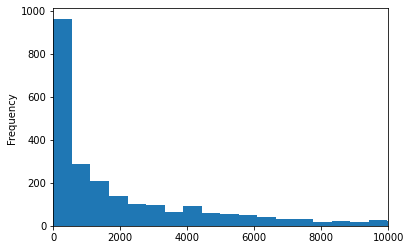

In [28]:
adata_JE2_1r_exp.var['total_counts'].plot.hist(bins=2000,xlim=(0,10000))

<Axes: ylabel='Frequency'>

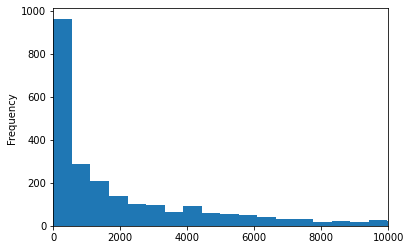

In [29]:
adata_JE2_2r_exp.var['total_counts'].plot.hist(bins=2000,xlim=(0,10000))

<Axes: ylabel='Frequency'>

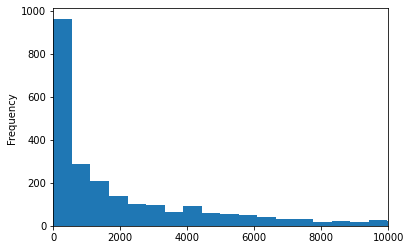

In [30]:
adata_JE2_3r_exp.var['total_counts'].plot.hist(bins=2000,xlim=(0,10000))

<Axes: ylabel='Frequency'>

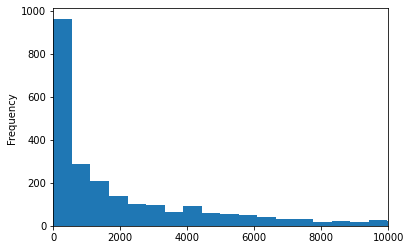

In [31]:
adata_JE2_4r_exp.var['total_counts'].plot.hist(bins=2000,xlim=(0,10000))

<Axes: ylabel='Frequency'>

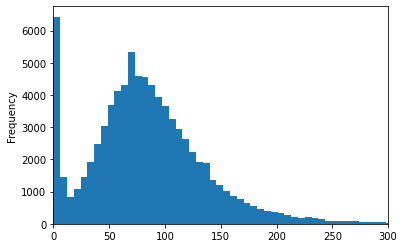

In [37]:
adata_JE2_1r_exp.obs['total_counts'].plot.hist(bins=400, xlim=(0,300))

<Axes: ylabel='Frequency'>

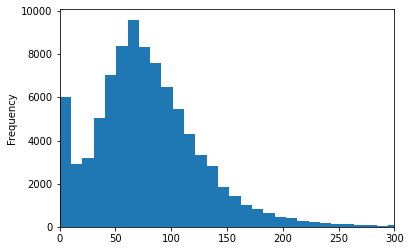

In [41]:
adata_JE2_2r_exp.obs['total_counts'].plot.hist(bins=500, xlim=(0,300))

<Axes: ylabel='Frequency'>

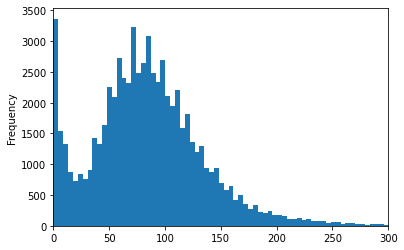

In [40]:
adata_JE2_3r_exp.obs['total_counts'].plot.hist(bins=300, xlim=(0,300))

<Axes: ylabel='Frequency'>

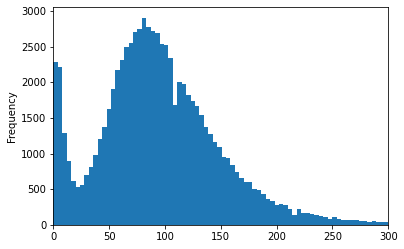

In [45]:
adata_JE2_4r_exp.obs['total_counts'].plot.hist(bins=300, xlim=(0,300))

In [15]:
#filter
sc.pp.filter_genes(adata, min_counts=30, inplace=True)
sc.pp.filter_cells(adata, min_counts=30, inplace=True)
adata.obs['sample'].value_counts()

JE2_2r_exp    76818
JE2_1r_exp    71401
JE2_4r_exp    70284
JE2_3r_exp    58930
Name: sample, dtype: int64

In [16]:
adata.obs['total_counts'].median()

88.0

In [17]:
adata[adata.obs['sample']=='JE2_1r_exp'].obs['total_counts'].median()

87.0

In [18]:
adata[adata.obs['sample']=='JE2_2r_exp'].obs['total_counts'].median()

81.0

In [19]:
adata[adata.obs['sample']=='JE2_3r_exp'].obs['total_counts'].median()

89.0

In [20]:
adata[adata.obs['sample']=='JE2_4r_exp'].obs['total_counts'].median()

97.0

In [21]:
adata.raw = adata # Freeze current version

scvi.data.setup_anndata(adata)

model = scvi.model.SCVI(adata,
                        n_layers=2,
                        n_latent=5,
                        n_hidden=64,
                        dropout_rate=0.1,
                        gene_likelihood='zinb',
                        dispersion='gene'
                       )
model.train()

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 277433 cells, 2566 vars, 1        
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


/Users/peien/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function setup_anndata is deprecated; Please use the model-specific setup_anndata methods instead. The global method will be removed in version 0.15.0.
  warnings.warn(msg, category=FutureWarning)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores


Epoch 29/29: 100%|██████████| 29/29 [58:15<00:00, 120.54s/it, loss=247, v_num=1]


In [22]:
latent = model.get_latent_representation()
adata.obsm["X_scVI"] = latent

In [23]:
adata.layers["scvi_normalized"] = model.get_normalized_expression(
    library_size=10e4
)

In [24]:
adata.obsm['latent'] = model.get_latent_representation()
sc.pp.neighbors(adata, use_rep='latent')
sc.tl.umap(adata)

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'sample' as categorical


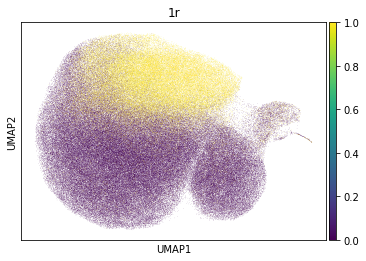

In [25]:
#visualize individual sample
adata.obs['1r'] = 0
adata.obs.loc[adata.obs['sample']=='JE2_1r_exp', '1r']=1
sc.pl.umap(adata, color='1r')

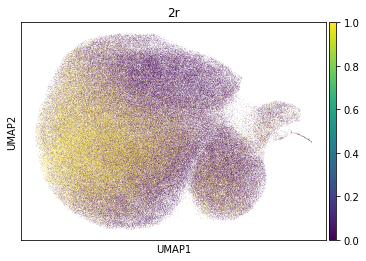

In [26]:
#visualize individual sample
adata.obs['2r'] = 0
adata.obs.loc[adata.obs['sample']=='JE2_2r_exp', '2r']=1
sc.pl.umap(adata, color='2r')

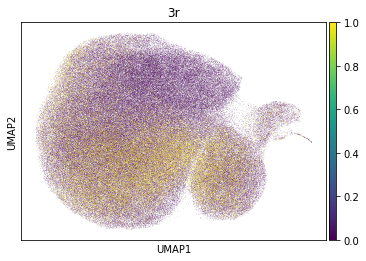

In [27]:
#visualize individual sample
adata.obs['3r'] = 0
adata.obs.loc[adata.obs['sample']=='JE2_3r_exp', '3r']=1
sc.pl.umap(adata, color='3r')

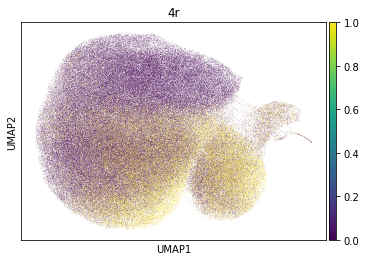

In [28]:
#visualize individual sample
adata.obs['4r'] = 0
adata.obs.loc[adata.obs['sample']=='JE2_4r_exp', '4r']=1
sc.pl.umap(adata, color='4r')

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


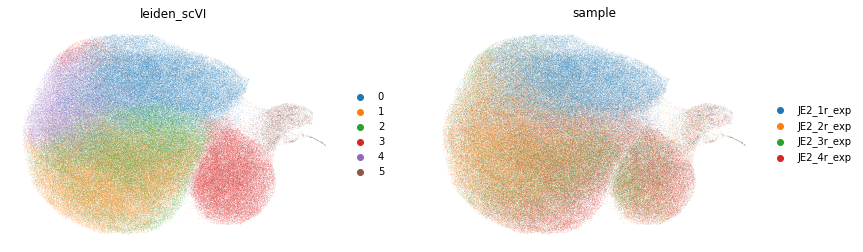

In [29]:
#Clustering on the scVI latent space

sc.tl.leiden(adata, key_added="leiden_scVI", resolution=0.18)

sc.pl.umap(
    adata,
    color=["leiden_scVI","sample"],
    frameon=False
)

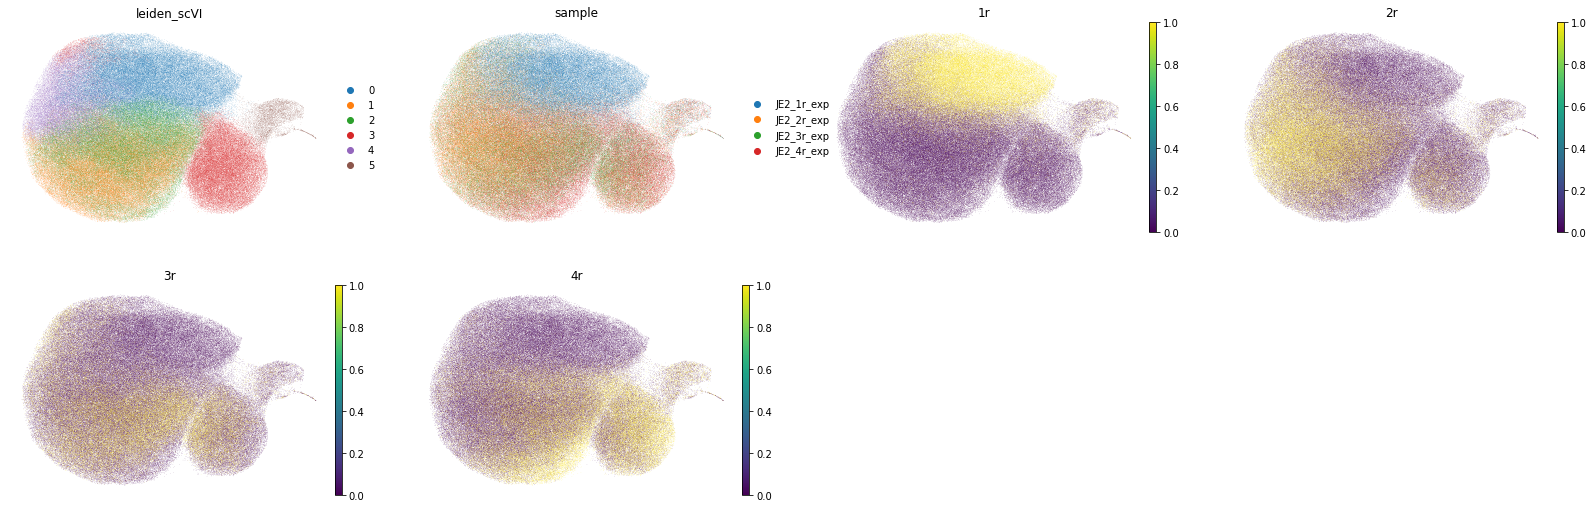

In [27]:
sc.pl.umap(
    adata,
    color=["leiden_scVI","sample","1r","2r","3r","4r"],
    frameon=False,
    save="leiden_scVI.pdf"
)

# Rename the genes

In [18]:
USA300_gene_info = pd.read_csv('/Users/peien/Dropbox (NYU Langone Health)/evolution/230422_PETRI/USA300_FPR3757GeneSpecificInformation_NCBI 2017-03-02.tsv', sep='\t')
USA300_gene_info.drop(USA300_gene_info.tail(1).index,inplace=True) #drop website resource annotation
USA300 = USA300_gene_info[['locus tag', 'pan gene symbol']]
for i in range(len(USA300)):
    if USA300.loc[i,'pan gene symbol']=='-':
        USA300.loc[i,'pan gene symbol'] = USA300.loc[i,'locus tag']

USA300.index = USA300['locus tag']        
USA300

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/peien/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,locus tag,pan gene symbol
locus tag,,
SAUSA300_RS00010,SAUSA300_RS00010,dnaA
SAUSA300_RS00015,SAUSA300_RS00015,dnaN
SAUSA300_RS00020,SAUSA300_RS00020,SAUSA300_RS00020
SAUSA300_RS00025,SAUSA300_RS00025,recF
SAUSA300_RS00030,SAUSA300_RS00030,gyrB
...,...,...
SAUSA300_RS14905,SAUSA300_RS14905,SAUSA300_RS14905
SAUSA300_RS14910,SAUSA300_RS14910,SAUSA300_RS14910
SAUSA300_RS14915,SAUSA300_RS14915,SAUSA300_RS14915


In [19]:
duplicates = USA300['pan gene symbol'].duplicated(keep=False)
# Set 'ID' equal to 'locus tag' where duplicates are True
USA300.loc[duplicates, 'pan gene symbol'] = USA300.loc[duplicates, 'locus tag']
USA300['pan gene symbol'].value_counts()

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/peien/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


dnaA                1
SAUSA300_RS09950    1
SAUSA300_RS15440    1
SAUSA300_RS09910    1
SAUSA300_RS09915    1
                   ..
SAUSA300_RS04920    1
SAUSA300_RS04925    1
ltaA                1
ugtP                1
SAUSA300_RS14925    1
Name: pan gene symbol, Length: 3063, dtype: int64

In [20]:
# Create a dictionary for renaming
rename_dict = USA300['pan gene symbol'].to_dict()

rename_dict can be loaded from the USA300_FPR3757 folder

In [19]:
adata.var_names = [rename_dict.get(col, col) for col in adata.var_names]

In [20]:
adata.var_names_make_unique()

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


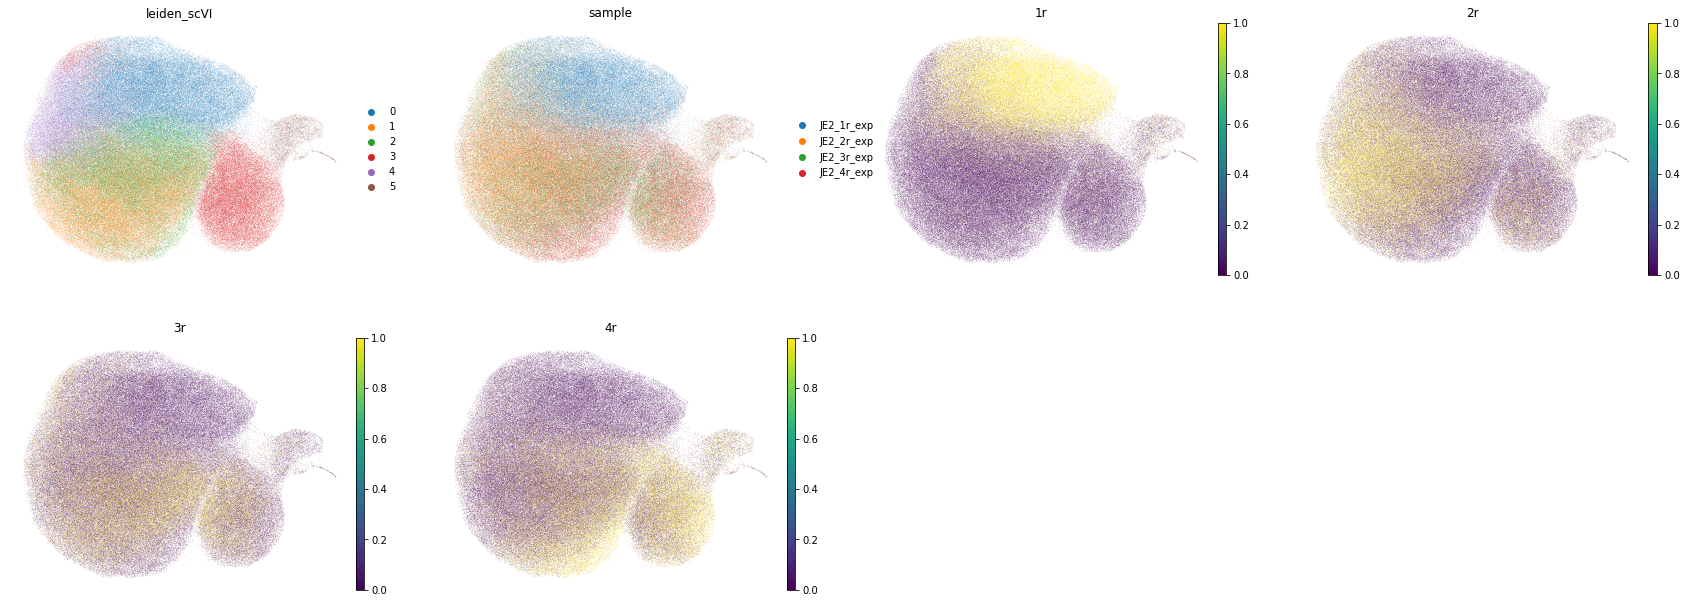

In [25]:
sc.pl.umap(
    adata,
    color=["leiden_scVI","sample","1r","2r","3r","4r"],
    frameon=False,
    #save="leiden_scVI.pdf"
)

In [35]:
adata.obs['sample'] = adata.obs['sample'].str.split('_').str[1]
adata.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,sample,n_counts,_scvi_batch,_scvi_labels,1r,2r,3r,4r,leiden_scVI,_scvi_raw_norm_scaling
BS22735A_bc1_10_bc2_10_bc3_17,93,4.543295,123.0,4.820282,65.040650,100.000000,100.0,100.0,1r,123.0,0,0,1,0,0,0,0,81.300812
BS22735A_bc1_10_bc2_10_bc3_25,110,4.709530,145.0,4.983607,58.620690,93.103448,100.0,100.0,1r,145.0,0,0,1,0,0,0,4,68.965515
BS22735A_bc1_10_bc2_10_bc3_38,72,4.290459,85.0,4.454347,74.117647,100.000000,100.0,100.0,1r,85.0,0,0,1,0,0,0,0,117.647064
BS22735A_bc1_10_bc2_10_bc3_59,56,4.043051,66.0,4.204693,90.909091,100.000000,100.0,100.0,1r,66.0,0,0,1,0,0,0,3,151.515152
BS22735A_bc1_10_bc2_10_bc3_7,30,3.433987,41.0,3.737670,100.000000,100.000000,100.0,100.0,1r,41.0,0,0,1,0,0,0,4,243.902435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BS22742A_bc1_9_bc2_9_bc3_22,73,4.304065,91.0,4.521789,74.725275,100.000000,100.0,100.0,1r,91.0,0,0,1,0,0,0,0,109.890114
BS22742A_bc1_9_bc2_9_bc3_44,71,4.276666,81.0,4.406719,74.074074,100.000000,100.0,100.0,1r,81.0,0,0,1,0,0,0,0,123.456795
BS22742A_bc1_9_bc2_9_bc3_56,47,3.871201,50.0,3.931826,100.000000,100.000000,100.0,100.0,1r,50.0,0,0,1,0,0,0,0,200.000000
BS22742A_bc1_9_bc2_9_bc3_94,56,4.043051,63.0,4.158883,90.476190,100.000000,100.0,100.0,1r,63.0,0,0,1,0,0,0,0,158.730164


In [37]:
de_df = model.differential_expression(
    groupby="sample"
)
de_df

DE...: 100%|██████████| 4/4 [01:11<00:00, 17.80s/it]


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
SAUSA300_RS07045,0.9670,0.0330,3.377691,0.000045,0.000010,0.0,0.25,2.482850,2.694199,1.602263,...,0.003922,0.000563,0.003908,0.000558,0.400482,0.054771,True,1r vs Rest,1r,Rest
rocF,0.9658,0.0342,3.340731,0.000123,0.000026,0.0,0.25,2.355963,2.562808,1.401714,...,0.010294,0.001888,0.010070,0.001878,1.077039,0.188629,True,1r vs Rest,1r,Rest
ctsR,0.9648,0.0352,3.310874,0.000438,0.000076,0.0,0.25,2.795739,2.932580,1.908584,...,0.045378,0.007523,0.042688,0.007295,4.442374,0.782461,True,1r vs Rest,1r,Rest
lysC,0.9646,0.0354,3.305001,0.000177,0.000030,0.0,0.25,2.526207,2.593419,1.803647,...,0.010168,0.001869,0.009384,0.001776,1.057934,0.195148,True,1r vs Rest,1r,Rest
SAUSA300_RS14090,0.9644,0.0356,3.299160,0.000132,0.000013,0.0,0.25,3.116305,3.254002,2.257864,...,0.012437,0.000781,0.011849,0.000762,1.312147,0.080015,True,1r vs Rest,1r,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pstC,0.4828,0.5172,-0.068827,0.000012,0.000012,0.0,0.25,0.004861,-0.001226,0.441016,...,0.000726,0.000367,0.000726,0.000352,0.073926,0.039305,False,4r vs Rest,4r,Rest
SAUSA300_RS07660,0.4806,0.5194,-0.077639,0.000012,0.000012,0.0,0.25,0.079472,0.058726,0.554087,...,0.000740,0.000652,0.000740,0.000647,0.070991,0.070354,False,4r vs Rest,4r,Rest
SAUSA300_RS07685,0.4776,0.5224,-0.089660,0.000007,0.000007,0.0,0.25,0.044285,0.034277,0.468151,...,0.000171,0.000174,0.000171,0.000174,0.019687,0.020540,False,4r vs Rest,4r,Rest
atpC,0.4672,0.5328,-0.131389,0.000981,0.001013,0.0,0.25,-0.049730,-0.038659,0.464020,...,0.098586,0.096114,0.092340,0.089607,9.262433,10.212797,False,4r vs Rest,4r,Rest


In [39]:
markers = {}
cats = adata.obs['sample'].cat.categories
for i, c in enumerate(cats):
    cid = "{} vs Rest".format(c)
    cell_type_df = de_df.loc[de_df.comparison == cid]

    cell_type_df = cell_type_df[cell_type_df.lfc_mean > 0]

    cell_type_df = cell_type_df[cell_type_df["bayes_factor"] > 2]
    cell_type_df = cell_type_df[cell_type_df["non_zeros_proportion1"] > 0.05]

    markers[c] = cell_type_df.index.tolist()[:10]
    
markers

{'1r': ['narG',
  'nasD',
  'narK',
  'SAUSA300_RS01980',
  'groES',
  'clpB',
  'mcsB',
  'glpD',
  'groEL',
  'pflB'],
 '2r': ['pflB',
  'narG',
  'lctP2',
  'ssaA',
  'isaA',
  'ldh1',
  'pyrP',
  'pyrB',
  'carA',
  'carB'],
 '3r': ['ssaA', 'sle1', 'isaA'],
 '4r': ['ssaA',
  'isaA',
  'sle1',
  'pbuX',
  'SAUSA300_RS03490',
  'SAUSA300_RS11810',
  'prsA',
  'guaB',
  'atl']}

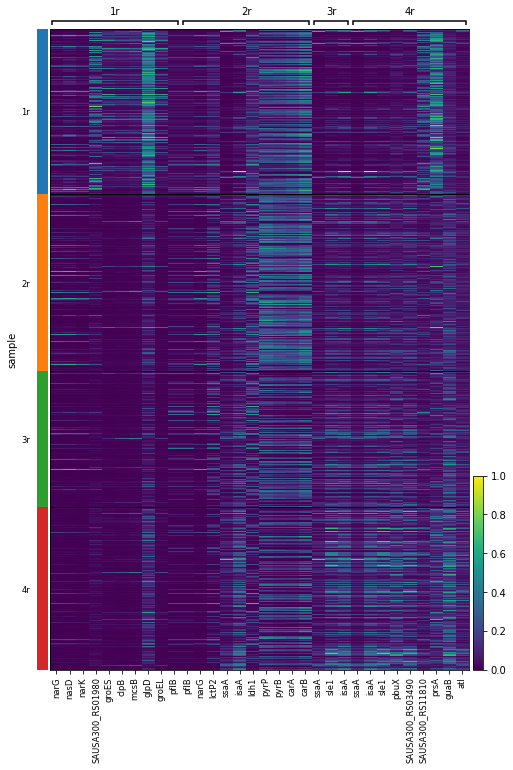

In [40]:
sc.pl.heatmap(
    adata,
    markers,
    groupby='sample',
    layer="scvi_normalized",
    standard_scale="var",
    dendrogram=False,
    figsize=(8, 12),
    save="sample_gene_markers.pdf"
)

In [26]:
adata.write_h5ad("NEWonlymRNA_scVI_evo1234exp_g20230729_FINAL.h5ad")
model.save('NEWonlymRNA_model_scVI_evo1234exp_g20230729_FINAL')